DAY 25 -- Mar 21, 2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
input_dir = "./data/"

# Load my data
train_file = os.path.join(input_dir, "train.csv")
test_file = os.path.join(input_dir, "test.csv")

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

In [4]:
y = train[["SalePrice"]]
X = train.drop(["SalePrice", "Id"], axis=1)

### Features

In [5]:
# Number of features
print(X.shape)

(1460, 79)


In [6]:
categorical_var = X.dtypes[X.dtypes == object]

print("Number of categorical features:", len(categorical_var), "\n")
for f in categorical_var.index:
    print("{}:\t {}".format(f, pd.unique(X[f])))

Number of categorical features: 43 

MSZoning:	 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street:	 ['Pave' 'Grvl']
Alley:	 [nan 'Grvl' 'Pave']
LotShape:	 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour:	 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities:	 ['AllPub' 'NoSeWa']
LotConfig:	 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope:	 ['Gtl' 'Mod' 'Sev']
Neighborhood:	 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1:	 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2:	 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType:	 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle:	 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle:	 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl:	 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Mem

In [7]:
# Number of features after mapping of categorical features to numbers
X2 = pd.get_dummies(X)
print(X2.shape)

# Drop na
X2.dropna(axis=1, how='any', inplace=True)
print(X2.shape)

(1460, 288)
(1460, 285)


### Kaggle: Linear regression of only quantitative variables

In [8]:
# Filter for only quantitative columns
X_quant = X[(X.dtypes[X.dtypes!=object]).index]
X_quant = X_quant.dropna(axis=1)
X_quant.shape

features = X_quant.columns
len(features)

33

In [9]:
# Ensure test has features
features_test = test[features].dropna(axis=1).columns


In [10]:
# Unify features
features = list(set(features).intersection(set(features_test)))
len(features)

25

In [11]:
clf = LinearRegression()
scores = cross_val_score(clf, X_quant[features], y, cv=3)

# Print scores
print("The scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

The scores: [ 0.83387649  0.77871025  0.69953849]
Accuracy: 0.77 (+/- 0.11)


In [12]:
clf = LinearRegression()
clf.fit(X_quant[features], y)
y_test = clf.predict(test[features])

# Check that is not negative
print(sum(y_test < 0))
y_test[y_test<0] = 0

# Submission
predictions = pd.concat([test["Id"], pd.DataFrame(y_test, columns=["SalePrice"])], axis=1)
predictions.to_csv("saleprice_submission-linreg-quant25.csv", index=False)

[1]


KAGGLE: 0.43803

### Kaggle linear regression of one-hot + quantitative features

In [13]:
clf = LinearRegression()
scores = cross_val_score(clf, X2, y, cv=3)

# Print scores
print("The scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

The scores: [ 0.87766846  0.82330935  0.73942924]
Accuracy: 0.81 (+/- 0.11)


In [14]:
# Transform test set
test_dummies = pd.get_dummies(test).dropna(axis=1, how='any')
common_features = list(set(X2.columns).intersection(set(test_dummies.columns)))
common_features = [f for f in common_features if f != "Id"]
print(len(common_features))

259


In [15]:
clf = LinearRegression()
scores = cross_val_score(clf, X2[common_features], y, cv=3)

# Print scores
print("The scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

The scores: [ 0.85407967  0.80668306  0.74405846]
Accuracy: 0.80 (+/- 0.09)


In [16]:
# Make prediction
clf = LinearRegression()
clf.fit(X2[common_features], y)
y_test = clf.predict(test_dummies[common_features])

# Check that is not negative
print(sum(y_test < 0))
y_test[y_test<0] = 0

# Submission
predictions = pd.concat([test["Id"], pd.DataFrame(y_test, columns=["SalePrice"])], axis=1)
predictions.to_csv("saleprice_submission-linreg-all259.csv", index=False)

[1]


KAGGLE: Your submission scored 0.45646

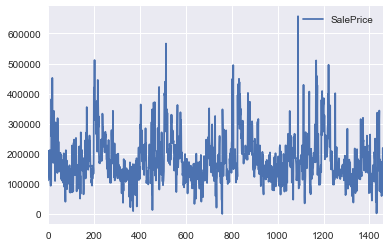

In [17]:
predictions[["SalePrice"]].plot()